# Decision Trees

In [38]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [39]:
dataset = load_iris()

In [40]:
X, y = dataset["data"], dataset["target"]

In [41]:
X.shape, y.shape, X[:5], y[:5]

((150, 4),
 (150,),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [42]:
tree = DecisionTreeClassifier(max_depth= 3)

In [43]:
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [44]:
tree.predict_proba(X[:5])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [45]:
from sklearn.tree import export_graphviz

In [46]:
export_graphviz(tree, 
                feature_names=dataset.feature_names, 
                class_names=dataset.target_names,
                out_file="tree.dot",
                rounded=True,
                filled=True)

$ dot -Tpng tree.dot -o decision_tree.png.png
![decision tree](decision_tree.png)

# Decision Tree Algorithm
- Decision tree split the data samples using a certain feature with a certain threshold (petal length <= 2.45)
- It chooses a feature & threshold that maximize the impurity of the data (minimize the gini)
- It keeps splitting the tree till it reach the max_depth or reach a pure node (node with all samples with the same class)
- **samples**: Num of samples used in that node
- **values**: Num of each class used in the samples (sum of the values of classes = samples)
    - at node depth 2 right(length <= 4.85) we have 0 setosa samples, 1 versicolor samples, 45 viriginca samples
    - all sum to 46 which is total num of samples
- **class**: Predicted class
- **gini**: describes the impurity of the node (gini = 0: pure node, all the samples corresponds to the detected class)
    - gini = 1 - Sum(ratio of the i class)
    - at node depth 2 right(length <= 4.85), gini = 1-(0/46)-(1/46)-(45/46) = 0.043


### CART Algorithm
- **Loss** is the **weighted avarage** between **impurity** of left and right splits
- J= m_left/m * G_left + m_right/m * G_right
    - G_left/right measures the impurity of the left/right subset,
    - m_left/right is the number of instances in the left/right subset.
    
### Regularization
Decision trees always **overfits** the data. <br>
To regularize, tune the hyperparameters:
- **min_samples_split** (the minimum number of sam‐ples a node must have before it can be split)
- **min_samples_leaf** (the minimum number of samples a leaf node must have)
- **max_leaf_nodes** (maximum number of leaf nodes), and max_features (maximum number of features that are evaluated for splitting at each node). <br>

Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize

### Propability 
Class probability is always the ratio of the class's samples / total samples in the final node <br>


In [61]:
import numpy as np
X_new = np.array([
    [0, 0, 5,1]
])
predicted = tree.predict_proba(X_new)
predicted # array([[0.        , 0.33333333, 0.66666667]])
# note that probability of virginica = 4/6 = 0.667, no matter what is the input feature, as long as it ended up in that node

array([[0.        , 0.33333333, 0.66666667]])

# Regression

In [62]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
noise = np.random.randn(m, 1) / 20
y = y + noise

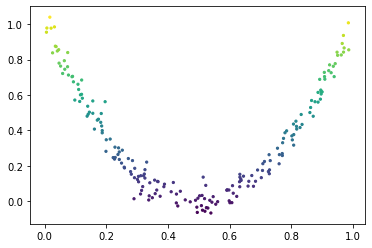

In [64]:
plt.scatter(x=X, y=y, s=5, c=y)

In [65]:
reg_tree = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=42)

In [66]:
X.shape, y.shape, X[:5], y[:5]

((200, 1),
 (200, 1),
 array([[0.37454012],
        [0.95071431],
        [0.73199394],
        [0.59865848],
        [0.15601864]]),
 array([[0.02895949],
        [0.82418623],
        [0.22993838],
        [0.00321642],
        [0.56658143]]))

In [67]:
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=42)

In [68]:
from sklearn.tree import export_graphviz
export_graphviz(reg_tree, 
                feature_names=["X"], 
                class_names=["y"],
                out_file="regression_tree.dot",
                rounded=True,
                filled=True)

![reg_tree](reg_tree.png)

## Regression Tree
- Value: the avarage values of all samples in that node
- for ex: in the most right node, value 0.667 is the avarage of 37 samples in that node
- This prediction(=value) results in a Mean Squared Error(MSE) equal to 0.025 over these 37 instances

In [81]:
def plot_reg_tree(reg_tree):
    global X, y
    axes = [0, 1, -0.2, 1]
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y1 = reg_tree.predict(x1)
    plt.scatter(X,y)
    plt.plot(x1, y1, c="red", linewidth=5)
    plt.scatter(X,y, c="blue", s=0.5)

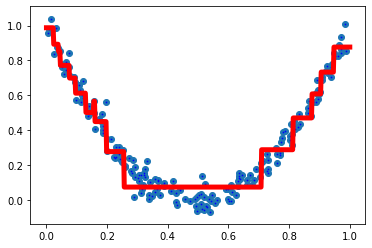

In [82]:
plot_reg_tree(reg_tree)

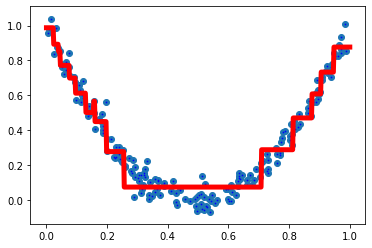

In [83]:
# try different hyperparameters
reg_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
reg_tree.fit(X,y)
plot_reg_tree(reg_tree)

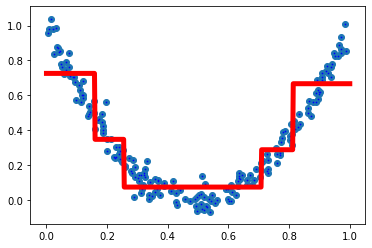

In [87]:
# power of hyperparameters to regularize
reg_tree = DecisionTreeRegressor(max_depth=4,
                                 min_samples_split=20,
                                 min_samples_leaf=20,
                                 random_state=42)
reg_tree.fit(X,y)
plot_reg_tree(reg_tree)

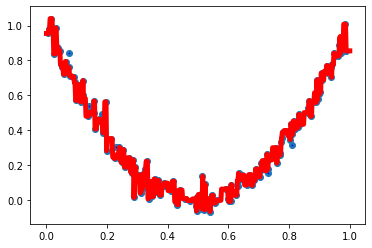

In [88]:
# No restrictions (overfitting)
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X,y)
plot_reg_tree(reg_tree)

Note that if you increase min_* hyperparmaeters, the tree gets regularized, and become more general, and if you don't use restrictions, it overfits

### CART Algorithm
Instead of using Impurity in the loss function, we do regression here so we use a wieghted avarage between left & right splits

J = m_left/m * **MSE_left** + m_right/m * **MSEright**